In [288]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

In [289]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
%ls

 Volume in drive C is OS
 Volume Serial Number is 38D4-2577

 Directory of C:\Users\hanna\surfs_up

07/31/2018  10:44 AM    <DIR>          .
07/31/2018  10:44 AM    <DIR>          ..
07/26/2018  07:30 PM    <DIR>          .ipynb_checkpoints
07/26/2018  05:54 PM           527,869 clean_measurements.csv
07/26/2018  05:54 PM               641 clean_stations.csv
07/31/2018  10:44 AM           337,308 climate_analysis.ipynb
07/26/2018  05:54 PM             3,642 data_engineering.ipynb
07/29/2018  03:44 PM             3,761 database_engineering .ipynb
07/29/2018  02:34 PM           761,856 hawaii.sqlite
07/26/2018  03:26 PM           594,406 hawaii_measurements.csv
07/30/2018  08:11 AM           745,472 hawaii_new.sqlite
07/26/2018  03:26 PM               628 hawaii_stations.csv
07/26/2018  03:28 PM                31 README.md
              10 File(s)      2,975,614 bytes
               3 Dir(s)  358,163,460,096 bytes free


In [290]:
engine = create_engine("sqlite:///hawaii_new.sqlite")

In [291]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [292]:
Base.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [293]:
Base.classes.keys()

['measurement', 'station']

In [294]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [295]:
session = Session(engine)

## Precipitation Analysis 

In [296]:
precipitation= session.query(Measurement.date,
                        Measurement.prcp)\
            .filter(Measurement.date>2017)\
            .order_by(Measurement.date.desc())
precipitation

In [297]:
for row in precipitation:
    print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11'

In [298]:
df = pd.read_sql_query(precipitation.statement,engine, index_col='date')


In [299]:
df.groupby('date').sum()
df.rename(columns = {'prcp': "Precipitation"}, inplace= True)
df.dropna(axis = 0, how = 'any', inplace = False)
df.head()

,Precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


<IPython.core.display.Javascript object>


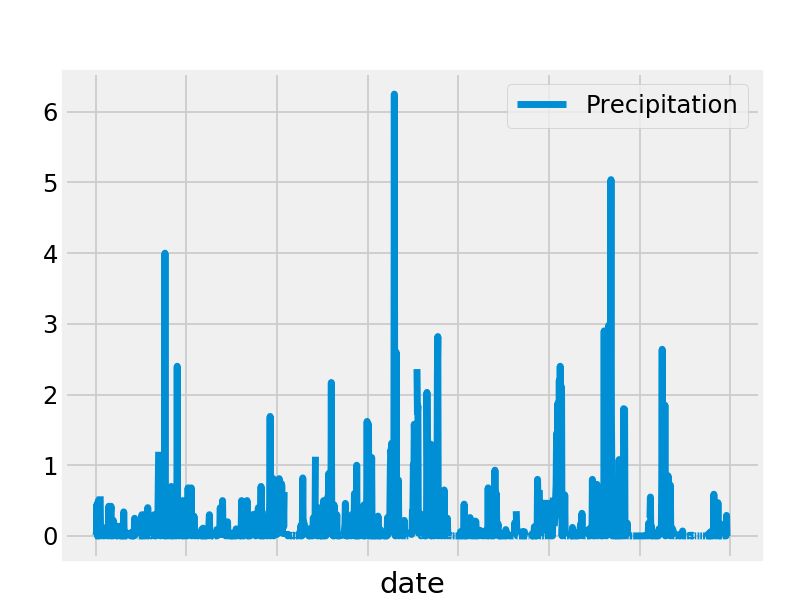

In [300]:
df.plot(kind = 'line')

In [107]:
sum_statistics = df.describe()
sum_statistics

,Precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


## Station Analysis

In [301]:
Station.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [302]:
station = session.query(Station.station,
                        Station.name,
                        Station.latitude,
                        Station.longitude,
                        Station.elevation)

station

In [303]:
for row in station:
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [304]:
df1 = pd.read_sql_query(station.statement,engine)
num_stations = len(df1)
num_stations

9

In [305]:
station_analysis = session.query(Station.station,
                        Station.name,
                        Station.latitude,
                        Station.longitude,
                        Station.elevation,
                        Measurement.tobs,
                        (func.count(Measurement.prcp)))\
    .filter(Station.station== Measurement.station)\
    .group_by(Station.station)\
    .order_by(func.count(Measurement.prcp).desc())

In [306]:
for row in station_analysis:
    print(row)

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 78.0, 2772)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 78.0, 2696)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 78.0, 2685)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 69.0, 2572)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 70.0, 2484)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 76.0, 1937)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 74.0, 1932)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 69.0, 683)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 66.0, 342)


In [307]:
df2 = pd.read_sql_query(station_analysis.statement, engine)
df2.rename(columns = {'count_1': 'Prcp Observations'})

,station,name,latitude,longitude,elevation,tobs,Prcp Observations
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,78.0,2772
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,78.0,2696
2,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,78.0,2685
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,69.0,2572
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,70.0,2484
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,76.0,1937
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,74.0,1932
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,69.0,683
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,66.0,342


In [308]:
tobs = session.query(Measurement.date,
                        Measurement.prcp)\
            .filter(Measurement.date>2017)\
            .order_by(Measurement.date.desc())


In [309]:
tobs = session.query(Station.station,
                        Station.name,
                        Station.latitude,
                        Station.longitude,
                        Station.elevation,
                         Measurement.prcp,
                        (func.count(Measurement.tobs)))\
    .filter(Station.station== Measurement.station)\
    .group_by(Station.station)\
    .order_by(func.count(Measurement.tobs).desc())

In [310]:
for row in tobs:
    print(row)

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 9.64, 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 4.2, 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 7.65, 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 6.38, 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 8.06, 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 11.53, 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 4.0, 1979)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.8, 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 6.3, 511)


In [311]:
tobs_df = pd.read_sql_query(tobs.statement, engine)
tobs_df

,station,name,latitude,longitude,elevation,prcp,count_1
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,9.64,2772
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,4.20,2724
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,7.65,2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.38,2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,8.06,2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,11.53,2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,4.00,1979
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,2.80,1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,6.30,511


In [314]:
#tobs_df.rename(columns = {'count_1': 'Total Observations'})


<IPython.core.display.Javascript object>


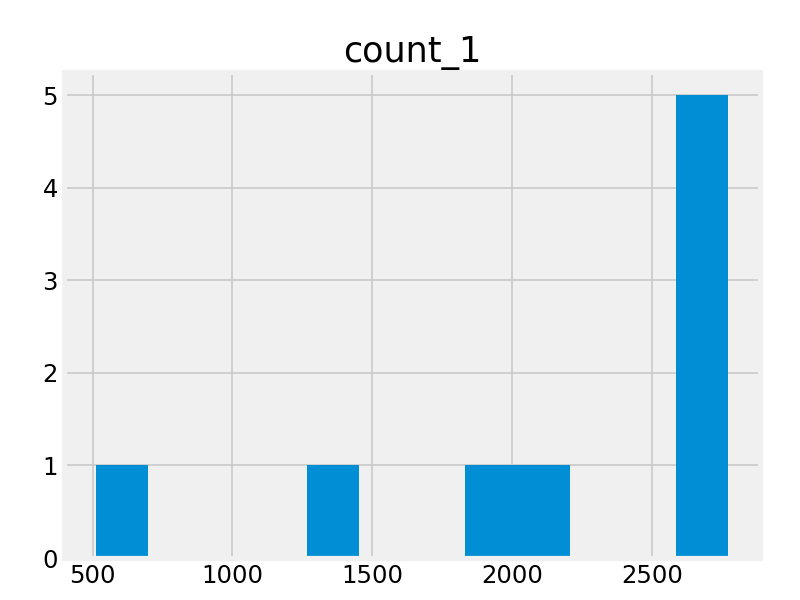

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3A1A66240>]],
      dtype=object)

In [316]:
tobs_df.hist(column='count_1',bins=12)